<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Neural%20Network%20Regression/01_neural_network_regression_w__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression w/ neural networks in Tensorflow

Regression problem - predicting a numerical variable based on combination of inputs, essentially predicting a number

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

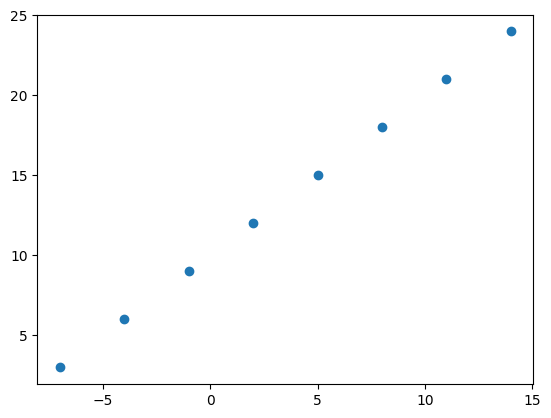

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (input data)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create demo tensor for hosuing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape # --> X[0] is a scalar!
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

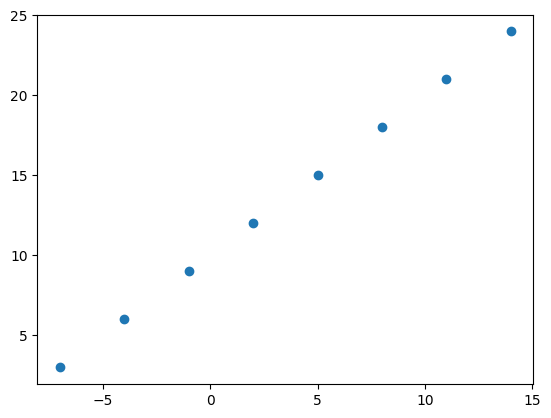

In [11]:
plt.scatter(X, y)

## Steps in modelling w/ TensorFlow

1.   **Creating a model** - define input and output layers, as well as the hidden layers of deep learning model.
2.   **Compiling a model** - define loss function (function which tells model how wrong it is) and the optimizer (tells model how to improve the patterns model is learning) and evaluation metrics (what to use to interpret the performance of model)
3.    **Fitting model** - letting model try to find patterns b/w X and y (features and labels)



In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD - Stochastic gradient descent
              metrics=["mae"])

# 3. Fit model
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 16.3523 - mae: 16.3523
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 16.0710 - mae: 16.0710
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 15.7898 - mae: 15.7898
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 15.5085 - mae: 15.5085
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 15.2273 - mae: 15.2273


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make prediction using model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 257ms/step


array([[-7.1645284]], dtype=float32)

In [15]:
y_pred + 11

array([[3.8354716]], dtype=float32)

## Improve Model

Can improve model by altering steps taken to create model

1. **Creating a model** - add more layers, increase # of hidden layers, increase # of neurons/layer, change activation function of each layer
2. **Compiling a model** - change optimization function or **learning rate** of optmization function
3. **Fitting a model** - fit model for more epochs (increase epochs or give mode more data/examples)

In [16]:
# Rebuild model

# 1. Create model
tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model (this time w/ inc. epochs or training time)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 654ms/step - loss: 14.9460 - mae: 14.9460
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 14.7540 - mae: 14.7540
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 14.6215 - mae: 14.6215
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 14.4890 - mae: 14.4890
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 14.3565 - mae: 14.3565
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 14.2240 - mae: 14.2240
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 14.0915 - mae: 14.0915
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 13.9590 - mae: 13.9590
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 13.8265 - mae: 13.8265
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 13.6940 - mae: 13.6940
Epoch 11/100
1/1 [==============================

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Predict w/ improved model
model.predict([17.0])

1/1 [==============================] - 0s 112ms/step


array([[29.730467]], dtype=float32)

In [19]:
# Rebuild model

# 1. Create model 
tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit model
model.fit(tf.expand_dims(X, 1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 723ms/step - loss: 6.7988 - mae: 6.7988
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 6.7980 - mae: 6.7980
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7973 - mae: 6.7973
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7965 - mae: 6.7965
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7958 - mae: 6.7958
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7950 - mae: 6.7950
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7943 - mae: 6.7943
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7935 - mae: 6.7935
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7928 - mae: 6.7928
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7920 - mae: 6.7920
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - l

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Predict w/ newer model
model.predict([17.0])

1/1 [==============================] - 0s 376ms/step


array([[29.830467]], dtype=float32)

## Evaluating a model

Build model --> fit model --> evaluate it --> tweak model --> Repeat...

Visualizing is very important:
- The data: what does data look like?
- The model - what does model look like?
- The training of a model- how does model perform while it learns?
- The predictions of the model - how does the model's predictions line up w/ original labels or expected outcomes

In [22]:
 # Make bigger dataset
 X = tf.range(-100, 100, 4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

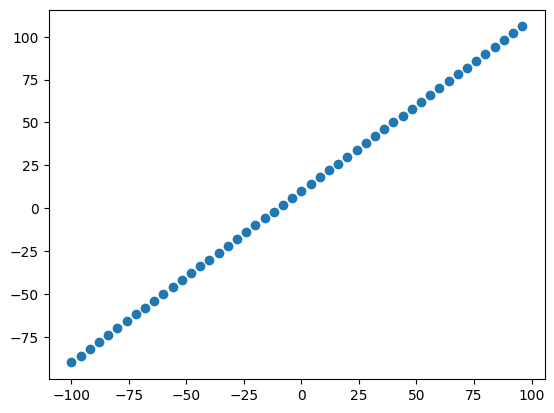

In [24]:
# Visualize data

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets: 

- **Training set** - model learns from data, typically 70-80% of total data available
- **Validation set** - model is tuned based on this data, 10-15% of available data
- **Test set** - model is evaluated on data to test what it has learned, typically 10-15% of total available data

In [25]:
# Check length of num of samples
len(X)

50

In [26]:
# Split data into test and train sets
X_train = X[:40] # first 40 training samples(80% of total data)
y_train = y[:40]

X_test = X[40:] # last testing samples (20% of total data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing data in newly created training and test sets


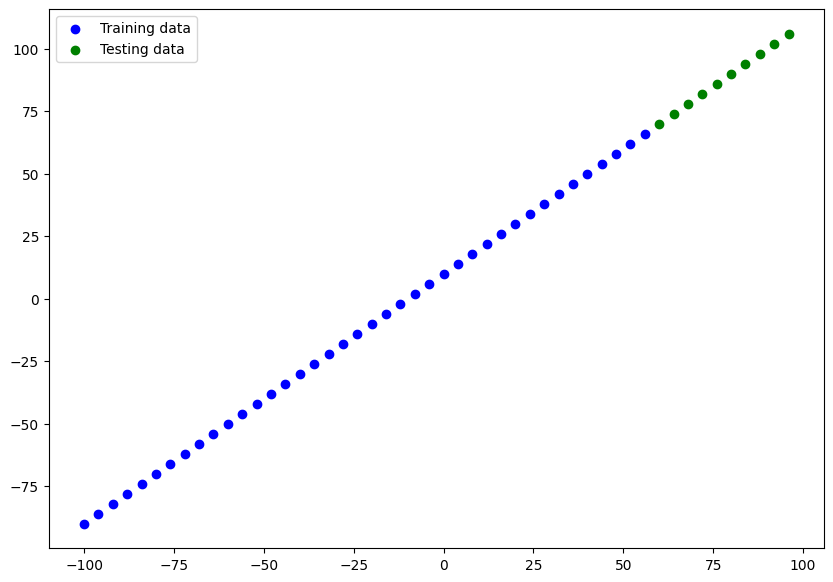

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # model learns on training data
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # moedl tested on testing data
# Show legend
plt.legend()

In [28]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model
#model.fit(X_train, y_train, epochs=100) #Fit model only on training

### Visualizing the model

In [29]:
model.summary()

ValueError: ignored

In [31]:
# Create model which builds automatically by defining input_shape arg in first layer
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
])

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params - total # of params in model
- Trainable params - params (patterns) model can update as it trains
- Non-trainable params - params aren't updated during training (typical when importing already learned patterns or params through **transfer learning**)

In [33]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


For every hidden layer added there are 2 trainable params per layer b/c number of layers * 2 = total params

In [34]:
# Fitting original model to trianing
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 12.5901 - mae: 12.5901 - 434ms/epoch - 217ms/step
Epoch 2/100
2/2 - 0s - loss: 18.3358 - mae: 18.3358 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 22.0424 - mae: 22.0424 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 12.7650 - mae: 12.7650 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 15.7703 - mae: 15.7703 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 12.4968 - mae: 12.4968 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 11.7623 - mae: 11.7623 - 7ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 12.1220 - mae: 12.1220 - 7ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 38.1905 - mae: 38.1905 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 25.7514 - mae: 25.7514 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 10.2391 - mae: 10.2391 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 25.2425 - mae: 25.2425 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 17.1113 - mae: 17.1113 - 8ms/epoch - 4ms/step
Epoch 14/100


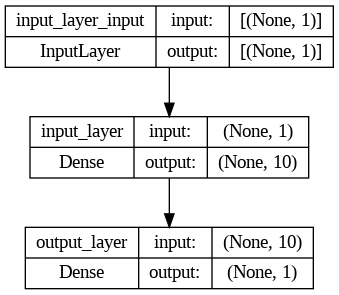

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [36]:
# Get summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### More model visualization and experimentation

In [37]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(100, name="hidden_layer1"),
   tf.keras.layers.Dense(10, name="hidden_layer2"),
   tf.keras.layers.Dense(1, name="output_layer1")
], name = "model_2")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer1 (Dense)       (None, 100)               1100      
                                                                 
 hidden_layer2 (Dense)       (None, 10)                1010      
                                                                 
 output_layer1 (Dense)       (None, 1)                 11        
                                                                 
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________


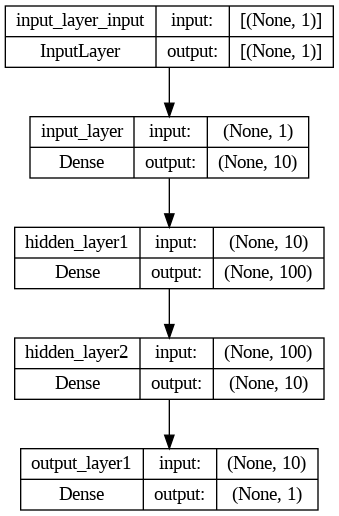

In [38]:
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

(Predictions from the original model from cell 75)

To visualize predictions: plot predictions vs actual values.

'y_test' or 'y_pred' vs 'y_pred' (actual vs model predictions)

In [39]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[-10.924352],
       [-11.65263 ],
       [-12.380944],
       [-13.109217],
       [-13.837503],
       [-14.565804],
       [-15.294094],
       [-16.022387],
       [-16.75068 ],
       [-17.478962]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# Creating plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """ 
  Plots training data, test data and compares predictions to actual value
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend()

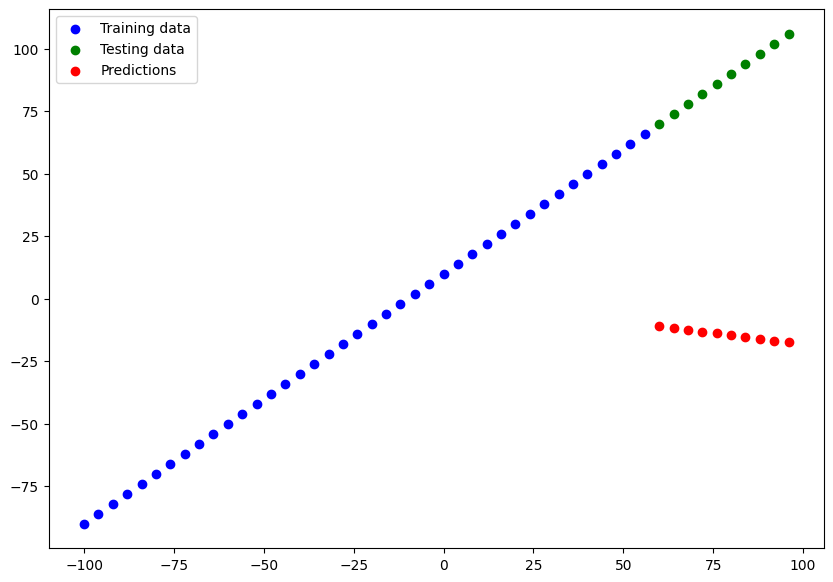

In [42]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred
                 )

### Evaluating model's predictions w/ regression evaluation metrics

Depending on problem, there will be diff evaluation metrics to evaluate model's performance. 

Current problem: regression problem, therefore 2 of the main metrics are:
- MAE - mean absolute error, "On avg how wrong is each model's prediction"
- MSE - mean square error, "square avg errors" (when larger errors are more significant than smaller errors)
- Huber - combination of MSE and MAE (less sensitive to outliers than MSE)

In [43]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 246ms/step - loss: 102.2017 - mae: 102.2017


[102.20166015625, 102.20166015625]

In [44]:
y_pred

array([[-10.924352],
       [-11.65263 ],
       [-12.380944],
       [-13.109217],
       [-13.837503],
       [-14.565804],
       [-15.294094],
       [-16.022387],
       [-16.75068 ],
       [-17.478962]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Calculate mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 98.924355,  99.65263 , 100.38094 , 101.109215, 101.8375  ,
       102.56581 , 103.29409 , 104.022385, 104.75069 , 105.47896 ],
      dtype=float32)>

Doesn't seem to be working right b/c it isn't outputting the same value as above in the evaluate model call (cell 99)

In [47]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-10.924352],
       [-11.65263 ],
       [-12.380944],
       [-13.109217],
       [-13.837503],
       [-14.565804],
       [-15.294094],
       [-16.022387],
       [-16.75068 ],
       [-17.478962]], dtype=float32)>

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Shape of y_test and y_pred tensor isn't equal therefore that is messing w/ calculating the MAE**

In [49]:
# Squeeze shape of y_pred tensor to get its shape to be same as y_test tensor
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-10.924352, -11.65263 , -12.380944, -13.109217, -13.837503,
       -14.565804, -15.294094, -16.022387, -16.75068 , -17.478962],
      dtype=float32)>

In [50]:
# Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=102.20166>

In [51]:
# Calculate mean square error
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10629.622>

In [52]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve model

How to improve model:
1. Get more data - more examples for model to train on (more opportunities to learn patterns or relationships b/w features and labels).
2. Make model larger (using a more complex model) - more layers or more hidden units per layer.
3. Train longer - give model more time/data to find patterns in data.

3 modelling experiments that are done in section below:
1. 'model_1' - same as original model, 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs
4. 'model_4' - 
5. 'model_5' - 

In [53]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [54]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 97.9962 - mae: 97.9962
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 62.5407 - mae: 62.5407
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 25.4406 - mae: 25.4406
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6723 - mae: 11.6723
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.0704 - mae: 13.0704
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6740 - mae: 7.6740
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13.3093 - mae: 13.3093
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 7.7736 - mae: 7.7736
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.9321 - mae: 19.9321
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.7593 - mae: 13.7593
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

1/1 [==============================] - 0s 90ms/step


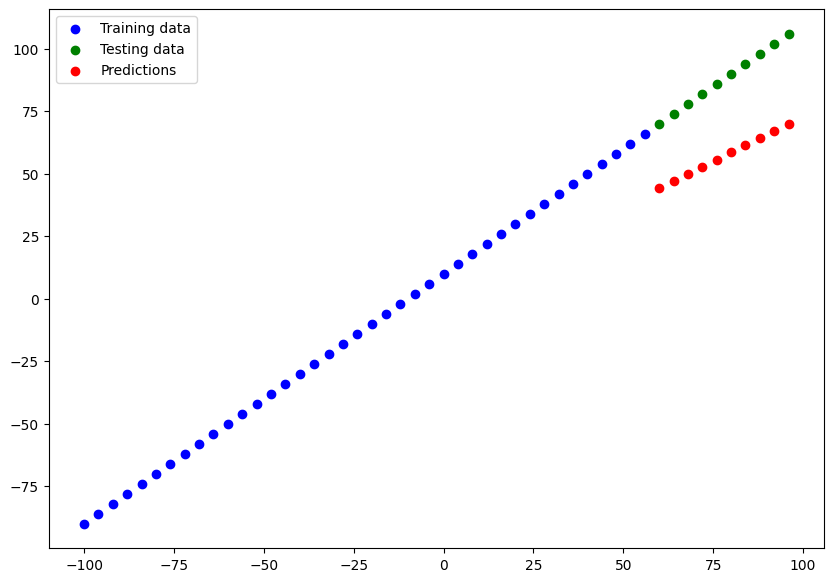

In [55]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [56]:
# Calculate mode_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.902328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=965.6092>)

**model_2**

- 2 dense layers created for 100 epochs

In [57]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 45.6457 - mse: 3187.9502
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 26.2287 - mse: 1095.0966
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 16.2311 - mse: 372.0373
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.1230 - mse: 256.9889
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.6373 - mse: 318.6739
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 12.3897 - mse: 196.2293
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.6499 - mse: 166.5150
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0255 - mse: 197.3373
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 37.5656 - mse: 2173.3301
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 25.2226 - mse: 892.4342
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 59ms/step


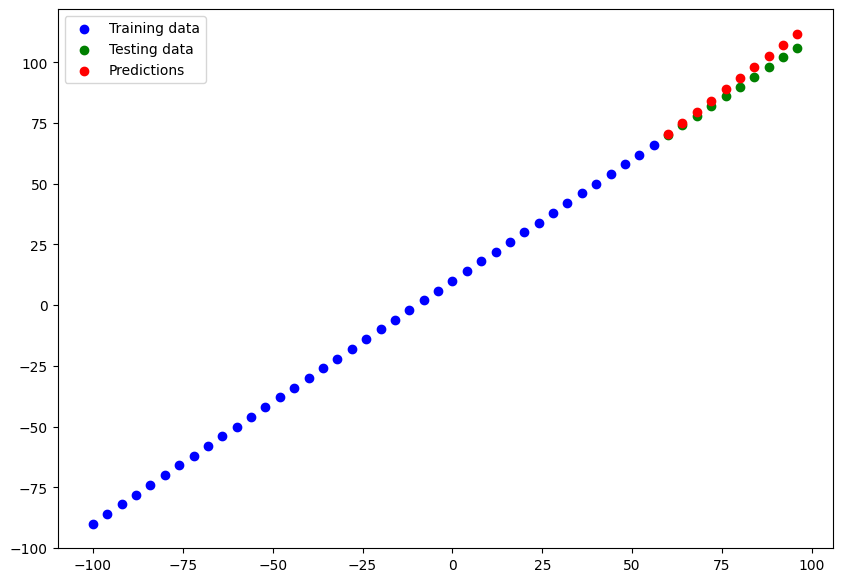

In [58]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [59]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1370819>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.655941>)

**'model_3'**

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 57.3620 - mae: 57.3620
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 39.6793 - mae: 39.6793
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 43.3153 - mae: 43.3153
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.5561 - mae: 27.5561
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.0448 - mae: 15.0448
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.9947 - mae: 11.9947
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 13.1282 - mae: 13.1282
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2236 - mae: 11.2236
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 41.6884 - mae: 41.6884
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 28.9261 - mae: 28.9261
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 79ms/step


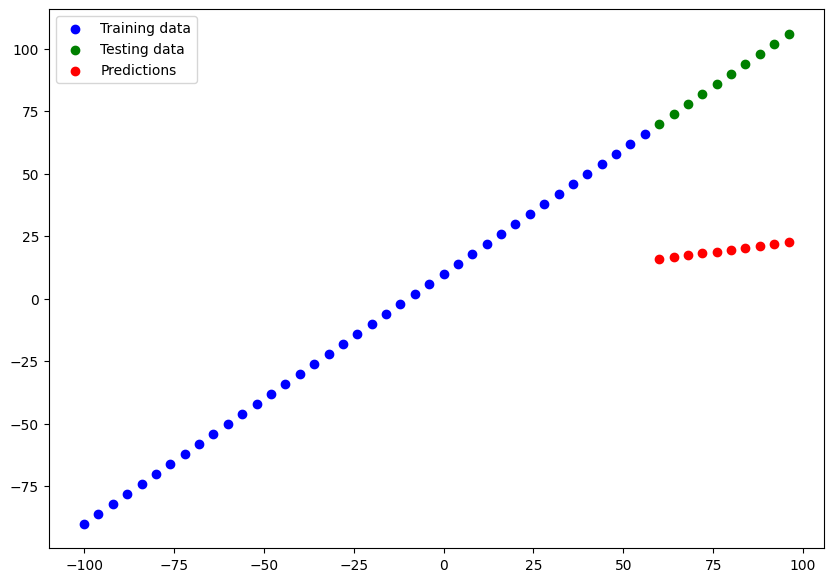

In [61]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [62]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.5884>)

**model_4**

- 3 dense layers created for 100 epochs

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_4.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 61.7514 - mae: 61.7514
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.9424 - mae: 31.9424
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 19.6098 - mae: 19.6098
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 17.0178 - mae: 17.0178
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 32.4519 - mae: 32.4519
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 16.0662 - mae: 16.0662
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 22.7467 - mae: 22.7467
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 8.8607 - mae: 8.8607
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 34.9251 - mae: 34.9251
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 19.0026 - mae: 19.0026
Epoch 11/100
2/2 [==============================] - 0s 12m

1/1 [==============================] - 0s 58ms/step


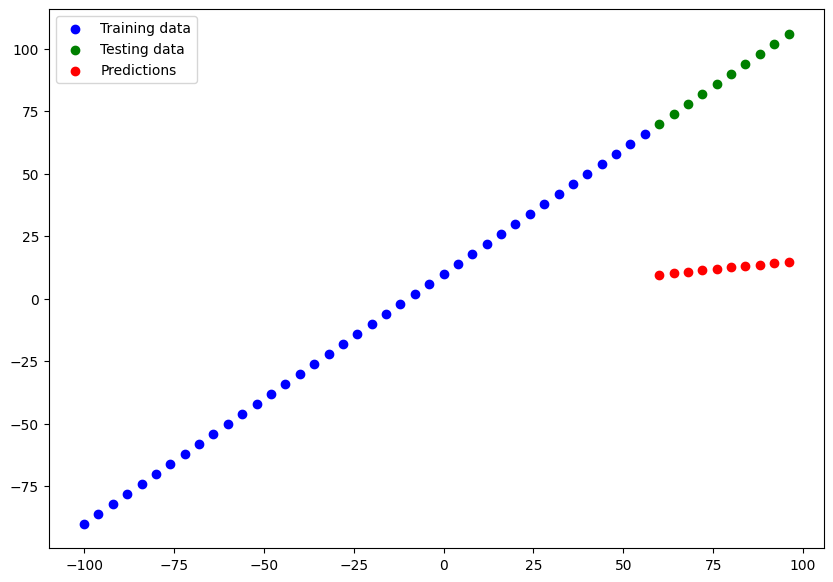

In [64]:
# Make and plot predictions
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [65]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=75.763115>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5836.389>)

**model_5**
2 dense layers for 100 epochs but w/ Adam optimization lr=0.0001

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

# 3. Fit model
model_5.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 53.4490 - mae: 53.4490
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 52.8912 - mae: 52.8912
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 52.3536 - mae: 52.3536
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 51.8087 - mae: 51.8087
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 51.2783 - mae: 51.2783
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 50.7472 - mae: 50.7472
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 50.2131 - mae: 50.2131
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 49.6631 - mae: 49.6631
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 49.1495 - mae: 49.1495
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 48.6371 - mae: 48.6371
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 53ms/step


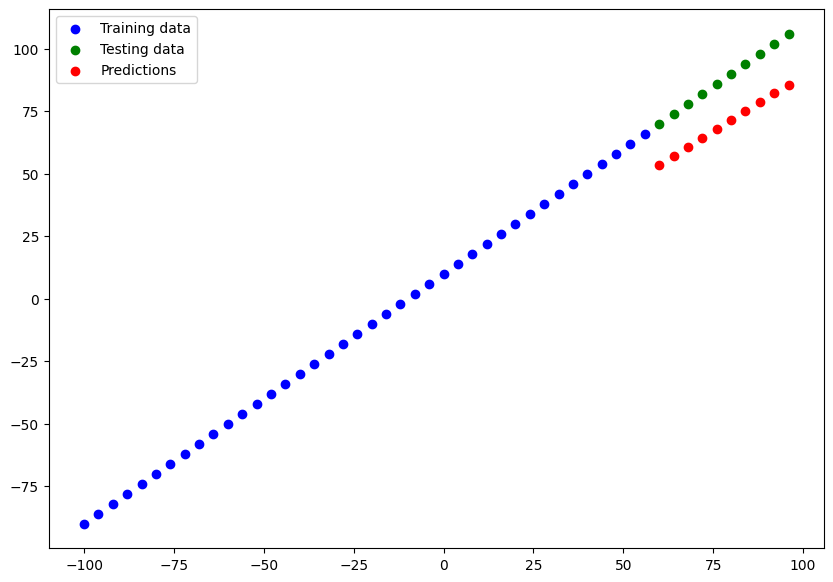

In [67]:
# Make and plot predictions for model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [68]:
# Calculate model_4 evaluation metrics
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=18.38676>,
 <tf.Tensor: shape=(), dtype=float32, numpy=339.5617>)

## Comparing results of experiments

In [69]:
# Compare model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()],
                 ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.902328,965.609192
1,model_2,3.137082,12.655941
2,model_3,68.716843,4808.588379
3,model_4,75.763115,5836.389160
4,model_5,18.386761,339.561707


model_2 performs the best

In [70]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving Models

Saving models enables models to be used outside of colab notebooks elsewhere

2 main formats to save model to:
- SavedModel format
- HDF5 format 

In [72]:
# Save model w/ SavedModel format
model_2.save("best_model_SavedModel_format")

In [73]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")